In [ ]:
# Necessary pip installs

!pip install scanpy
!pip install anndata

In [ ]:
# Load all of our necessary imports

import scanpy as sc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import anndata as anndata
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Load the data
adata = anndata.read_h5ad('adata_filtered.h5ad')

# Source: Aging Fly Cell Atlas (https://hongjielilab.org/afca/)
adata

AnnData object with n_obs × n_vars = 4619 × 15992
    obs: 'tissue', 'sex', 'age', 'sex_age', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'log1p_total_counts_mt', 'dataset', 'fca_annotation', 'afca_annotation', 'afca_annotation_broad'
    uns: 'afca_annotation_colors'
    obsm: 'X_pca', 'X_tsne', 'X_umap'

In [ ]:
# Perform differential gene analysis


# Extract results into a DataFrame
result = adata.uns['rank_genes_groups']
pvals = None
logfc = None

# Create DataFrame for plotting
volcano_df_5to30 = pd.DataFrame({
    'Gene': None,
    'Log2FoldChange': None,
    'P_value': None,
    '-log10(P_value)': None
})

# Sort DataFarme by significance
volcano_df_5to30 = volcano_df_5to30.sort_values(by='-log10(P_value)', ascending=False)

In [ ]:
# Volcano plot to see significant differently expressed genes and fold change
fig = px.scatter(

)

# Add significance threshold line
significance_threshold = -np.log10(0.05)
fig.add_trace(
    go.Scatter(
        x=[min(volcano_df_5to30['Log2FoldChange']), max(volcano_df_5to30['Log2FoldChange'])],
        y=[significance_threshold, significance_threshold],
        mode="lines",
        line=go.scatter.Line(color="red", dash="dash"),
        showlegend=False
    )
)

In [ ]:
# Heat map to show expression

# Format the data correctly: data frame for average gene expression by age
df = pd.DataFrame(columns=['Gene', '5', '30', '50', '70'])
all_genes = volcano_df_5to30.iloc[:10, :]['Gene'].values
df['Gene'] = all_genes

# Create a seaborn heatmap
plt.figure(figsize=(6, 7))
sns.heatmap()

# Formatting

# Show plot
plt.show()

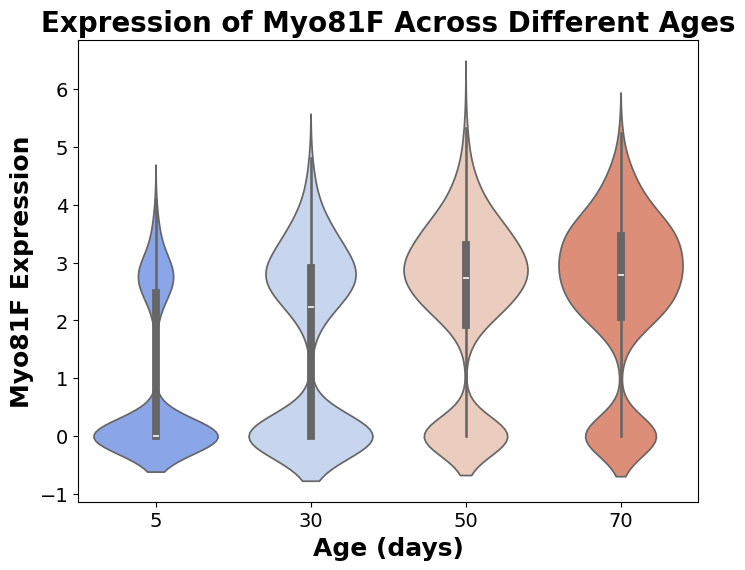

In [ ]:
# Challenge: Violin plot for Myo81F gene

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Assuming adata contains your gene expression data
gene_name = 'Myo81F'
ages = [5, 30, 50, 70]
gene_data = {'Age': [], 'Expression': []}

# Collect gene expression data for Myo81F across ages in long form
for age in ages:
    age_filter = adata[(np.array(adata.obs['age'], dtype=int) == age)]
    temp = age_filter.X[:, np.where(adata.var_names == gene_name)[0][0]].toarray().flatten()

    # Add age and expression to gene_data
    gene_data['Age'].extend([age] * len(temp))
    gene_data['Expression'].extend(temp)

# Convert to DataFrame for plotting
df_gene = pd.DataFrame(gene_data)

# Create a violin plot

